In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_csv("weight-height.csv")

In [105]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [106]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


<Axes: xlabel='Weight', ylabel='Count'>

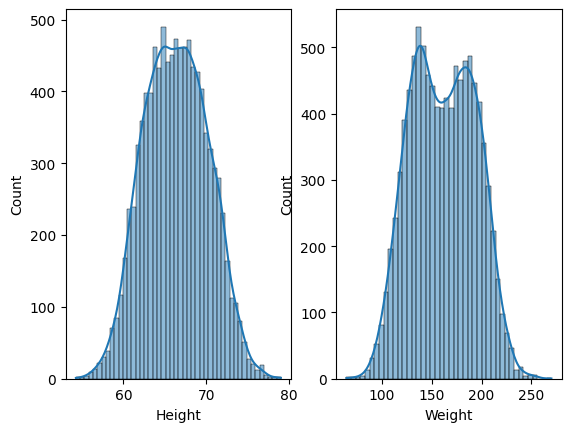

In [107]:
plt.subplot(1,2,1)
sns.histplot(df["Height"],kde=True)

plt.subplot(1,2,2)

sns.histplot(df["Weight"],kde=True)

<Axes: ylabel='Height'>

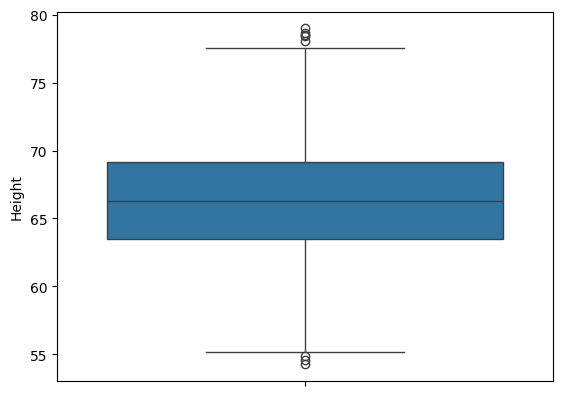

In [108]:
sns.boxplot(df["Height"])

In [111]:
#Trimming

def winz(lower_limit):
    
    upper_limit = 100-lower_limit
    lower_limit = np.percentile(df["Height"],lower_limit)
    upper_limit = np.percentile(df["Height"],upper_limit)


    temp_df = df["Height"][df["Height"]>upper_limit]    
    new_df = df.copy()
    new_df.drop(temp_df.index,inplace=True)

    temp_df = df["Height"][df["Height"]<lower_limit]
    new_df.drop(temp_df.index,inplace=True)
    print(new_df)

    plt.subplot(1,2,1)
    plt.title("Before Winz")
    sns.histplot(df["Height"],kde=True)

    plt.subplot(1,2,2)
    plt.title("After Winz")
    sns.histplot(new_df["Height"],kde=True)
    return new_df


      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[9998 rows x 3 columns]


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


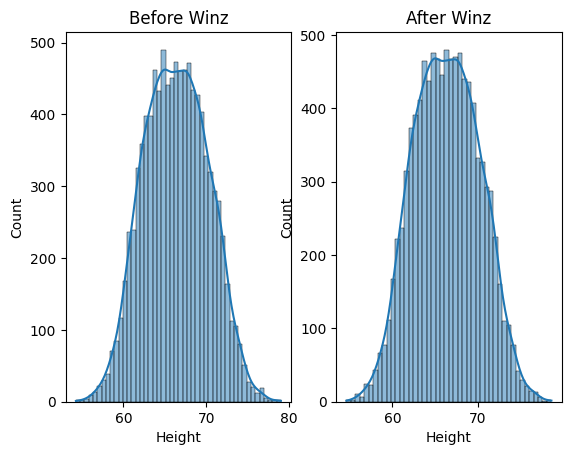

In [112]:
winz(0.01)


In [113]:
# Capping
lower_limit = np.percentile(df["Height"],1)
upper_limit = np.percentile(df["Height"],99)

df["Height"] = np.where(
    df["Height"] >= upper_limit , upper_limit , np.where(
        df["Height"]<=lower_limit , lower_limit , df["Height"] 
    )

)

In [114]:
df["Height"]

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

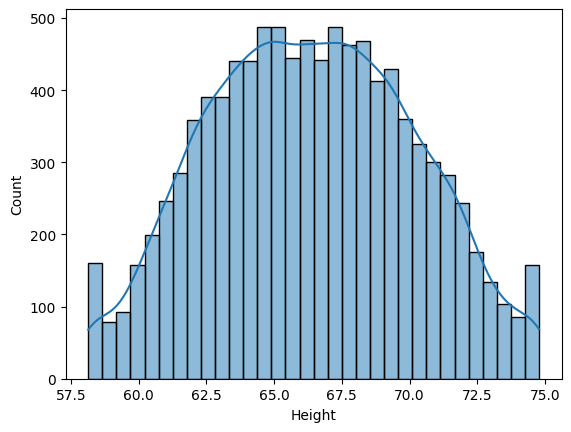

In [115]:
sns.histplot(df["Height"],kde=True)